## <center> Navegacao no Quarto Andar </center><br>
#### <center>  Robótica Computacional - Projeto 3 </center>
#### <center Professor Fábio Miranda </center>
<center> Eduardo Tirta, Guilherme Graicer, Gustavo Gobetti, Martim Ferreira José </center>



In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print "OpenCV Version : %s " % cv2.__version__
from Aestrela import aStar
from coisasPraAestrela import *

OpenCV Version : 3.2.0-dev 


In [2]:
map = cv2.imread("simplified_map_simulation_glass_low_resolution3.png")

In [3]:
map.shape

(83, 230, 3)

In [4]:
map_gray = cv2.cvtColor(map, cv2.COLOR_RGB2GRAY)

In [5]:
map_gray.shape

(83, 230)

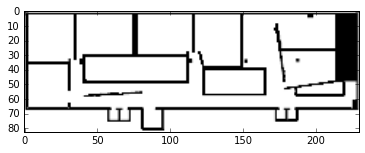

In [6]:
plt.imshow(map_gray, cmap="Greys_r", vmin=0, vmax=255)

In [7]:
print(map_gray)

[[255 255 255 ..., 255 255 255]
 [255 213 202 ..., 202 213 255]
 [255   0   0 ...,   0  49 255]
 ..., 
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]]


In [8]:
print(str(83*230)+" pixels")

19090 pixels


In [9]:
for i in range(len(map_gray)):
    for j in range(len(map_gray[i])):
        if map_gray[i][j] == 0:
            map_gray[i][j] = 1
        else:
            map_gray[i][j] = 0

In [10]:
start = Node(col=10, lin=10)
obj = Node(col=100, lin=10)

In [11]:
#print(map_gray[start.lin][start.col])
#print(map_gray[obj.lin][obj.col])

result, borda, explorado = aStar(obj, map_gray, start)
            
#print(result)

for i in range(len(map_gray)):
    for j in range(len(map_gray[i])):
        if map_gray[i][j] == 0:
            map_gray[i][j] = 255
        else:
            map_gray[i][j] = 0    
            
for e in explorado:
    map[e.lin][e.col] = np.array([0, 255, 0])

for e in borda:
    map[e.lin][e.col] = np.array([0, 0, 255])
    
    
while result != None:
    map_gray[result.lin][result.col] = 100
    map[result.lin][result.col] = np.array([255, 0, 0])
    result = result.pai
    



In [12]:
print(map_gray)

[[255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 [255   0   0 ...,   0 255 255]
 ..., 
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]]


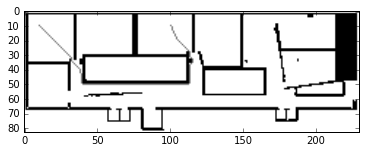

In [13]:
plt.imshow(map_gray, cmap="Greys_r", vmin=0, vmax=255)

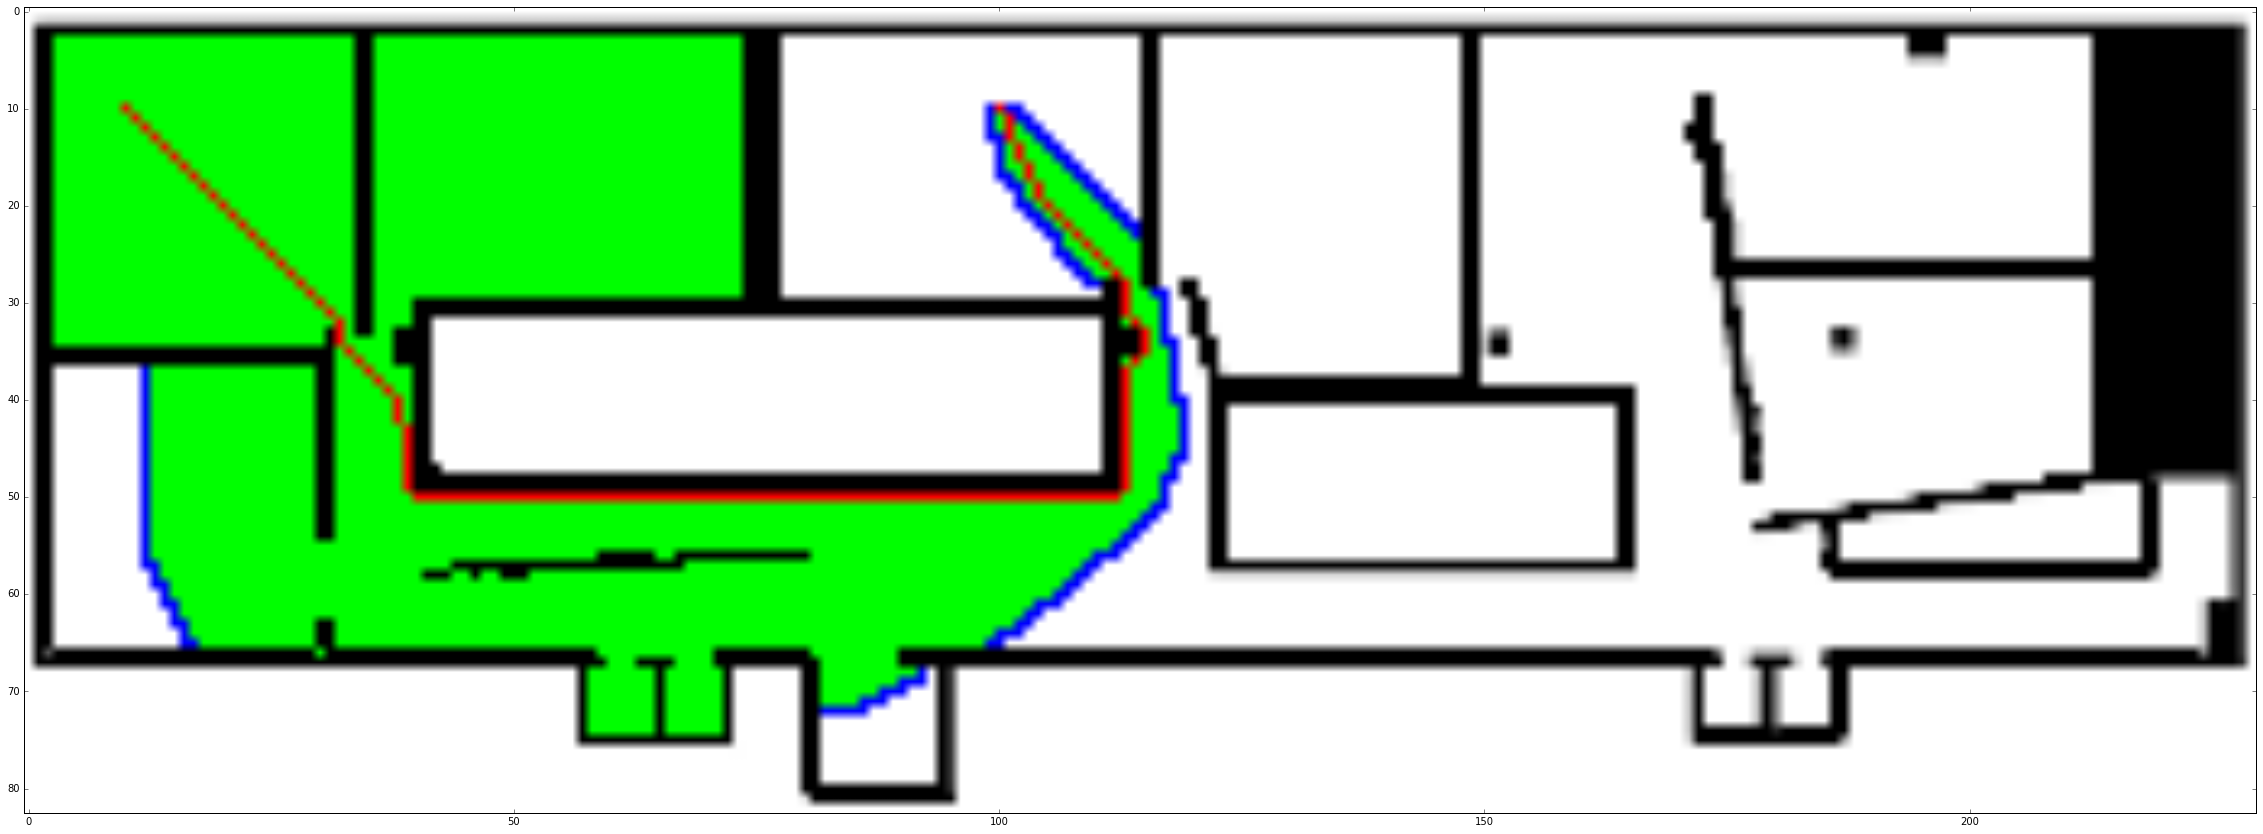

In [14]:
plt.figure(figsize=(40,20))
plt.imshow(map)
#print(borda, [c.custo for c in borda])